   **ΟΜΑΔΑ 82**

Στυλιανός Κανδυλάκης 03117088

Χρήστος-Κίτσος Ορφανόπουλος 03117025

#Μέρος 2. Kaggle Dataset

#Mount

In [85]:
#!pip install -U kaggle

In [86]:
#from google.colab import files
#files.upload()

In [87]:
#!mkdir ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

In [88]:
#!kaggle datasets list -s "Bankruptcy"

In [89]:
#! kaggle datasets download -d fedesoriano/company-bankruptcy-prediction 

In [90]:
#import os
#for dirname, _, filenames in os.walk('/content'):
#     for filename in filenames:
#        print(os.path.join(dirname,filename))



In [91]:
import pandas as pd
import numpy as np

In [92]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
#!ls "/content/drive/MyDrive"

#Επισκόπηση


Αρχίζουμε φορτώνοντας τα δεδομένα από το csv αρχείο.

In [94]:
df = pd.read_csv('/content/drive/My Drive/datasets/data.csv')

In [95]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,2.394682e-02,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0

In [96]:
#pd.set_option('display.max_columns',None)
#df.head()

Πρόκειται για dataset που περιέχει πληροφορίες για χρεοκοπημένες και μη εταιρίες από το 1999 έως το 2009. Πηγή είναι το Taiwan Economic Journal. 
Τα features που αντιστοιχούν σε κάθε δείγμα(εταιρία) αποτελούνται από 95 χρηματιστηριακούς δείκτες(FRs). 

Το classification γίνεται σε δύο κλασεις:

χρεοκοπημένη - 1

μη χρεοκοπημένη - 0

Ελέγχω αρχικά αν είναι ισορροπημένο το dataset.

In [97]:
print(df['Bankrupt?'].value_counts())      #δείγματα που αντιστοιχουν ανά κλάση
print()

print((df['Bankrupt?'].value_counts()/df.shape[0])*100)      #ποσοστά δειγμάτων

0    6599
1     220
Name: Bankrupt?, dtype: int64

0    96.77372
1     3.22628
Name: Bankrupt?, dtype: float64


To dataset είναι υπερβολικά imbalanced. 

Υπάρχουν δύο τρόποι να αντιμετωπίσουμε το imbalanced dataset: 

1) να πειράξουμε το dataset( under/oversampling τεχνικές)

2) να αλλάξουμε τις μετρικές απόδοσης ( F1-score κτλ)

Επειδή τις παραπάνω τεχνικές θα τις μελετήσουμε διεξοδικά στην βελτιστοποίηση των ταξινομητών, στην out-of-the-box περίπτωση θα χρησιμοποιήσουμε το dataset 
ως έχει. 



Επίσης παρατηρώ πως οι τιμές των features είναι μεταξύ [0,1] , οπότε είναι ήδη κανονικοποιημένα.

In [98]:
df.isnull().values.any() 
print()
df.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

Δεν υπάρχουν κενές τιμές(NaN) στα χαρακτηριστικά.
Ωστόσο υπάρχουν κατηγορήματα στα παρακάτω features:

Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise 

Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise

τα οποία παίρνουν binary τιμές 0,1 οπότε είναι οκ.

Ωστόσο με μια πιο προσεκτική ματιά , παρατηρούμε πως για το net income flag οι τιμές είναι ταυτόσημες οπότε μπορώ να κάνω drop αυτή τη στήλη.

In [99]:
a = df.iloc[:,94]
b = df.iloc[:,85]
print(a.value_counts()) 
print(b.value_counts())

1    6819
Name:  Net Income Flag, dtype: int64
0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64


#Μετρικές

Το accuracy score δεν είναι καλή επιλογή, διότι το dataset είναι imbalanced.
Ούτε το F1-score είναι ιδανική επιλογή, αλλά θα το χρησιμοποιήσω στην out-of-the-box μελέτη και με παράμετρο micro-average, που ενδείκνυται για imbalanced set.
Βέβαια, υπάρχουν και καλύτερες μετρικές για imbalanced set , όπως η kappa, η ROC, η MCC, η Type I-II error.(ίσως τρέξω και αυτές) 


#Διαχείριση δεδομένων

In [100]:
selected_columns = df['Bankrupt?']

classes = selected_columns.copy()

Classes = classes.to_numpy()

Classes

array([1, 1, 1, ..., 0, 0, 0])

In [101]:
dff=df.copy()                                                #copy για να μην σβηστούν στο αρχικό dataset οι στήλες
dff
cols = [0, 94]
features = dff.drop(dff.columns[cols],axis=1,inplace=True)

In [102]:
Features = dff.to_numpy()

Αρχικά διαχωρίζω και κάνω τα data συμβατά με το scikit learn: 

In [103]:
print(Features.shape)
print()
print(Classes.shape)

(6819, 94)

(6819,)


Όπως πάντα κάνω split το αρχικό dataset ώστε να προκύψει training set στο οποίο θα κάνω το cross-validation.

In [104]:
from sklearn.model_selection import train_test_split
#X_train -> y_train
#X_test  -> y_test
X_train, X_test, y_train, y_test = train_test_split(Features, Classes, test_size=0.30)

In [105]:
print(X_test.shape)
print(y_train.shape)

(2046, 94)
(4773,)


In [106]:
print(np.bincount(y_test))
print()
print(np.bincount(y_train))



[1978   68]

[4621  152]


#Out-of-the-box

Στο chapter αυτό, θα εξετάσουμε τους ταξινομητές dummy(uniform, constant, stratified, most_frequent), MLP και SVM και θα αξιολογήσουμε την απόδοσή τους με τη βοήθεια των μετρικών που προανέφερα, χωρίς να κάνουμε βελτιστοποίηση.
Εδώ τρέχω τα πάντα με default τιμές.  

##Dummy classifier

Αρχικά εξετάζουμε τους dummy classifiers με χρήση της κλάσης DummyClassifier, η οποία δέχεται μια παράμετρο που καθορίζει την μέθοδο της dummy ταξινόμησης ως εξής:

"uniform”: προβλέπει τυχαία και ομοιόμορφα

“constant”: προβλέπει πάντα μία κατηγορία που τη διαλέγει ο χρήστης

“most_frequent”: προβλέπει πάντα την πιο συχνή κατηγορία στο training set

“stratified”: κάνει προβλέψεις διατηρώντας την κατανομή των κλάσεων στο training set.

In [107]:
from sklearn.dummy import DummyClassifier

import time

def DummyClassification(x_train,y_train,x_test,y_test):
    
    scores, predictions, fit_times, pred_times = {}, {}, {}, {}

    dc_uniform  = DummyClassifier(strategy="uniform")
    dc_const_0  = DummyClassifier(strategy="constant",constant=0)             #κλάση 0
    dc_const_1  = DummyClassifier(strategy="constant",constant=1)             #κλάση 1
    dc_stratif  = DummyClassifier(strategy="stratified")
    dc_frequent = DummyClassifier(strategy="most_frequent")

    #Fit
  
    dc_uniform.fit(x_train, y_train)
    
    dc_const_0.fit(x_train, y_train)
    
    dc_const_1.fit(x_train, y_train)
    
    dc_stratif.fit(x_train, y_train)
    
    dc_frequent.fit(x_train,y_train)
    
    #Predict
    
    predictions['uniform']  = dc_uniform.predict(x_test)      #επιστρέφει λίστα
    
    predictions['const_0']  = dc_const_0.predict(x_test)
    
    predictions['const_1']  = dc_const_1.predict(x_test)
    
    predictions['stratif']  = dc_stratif.predict(x_test)
    
    predictions['frequent'] = dc_frequent.predict(x_test)
    
    #accuracies , δεν με απασχολούν

    
    return predictions, scores, fit_times, pred_times

In [108]:
predictions, _,_,_ = DummyClassification(X_train,y_train,X_test,y_test)  

from sklearn.metrics import precision_score, recall_score , f1_score , confusion_matrix , ConfusionMatrixDisplay , matthews_corrcoef

for i in predictions:
      print("precision-score for", i, ':', precision_score(y_test, predictions[i], average = 'micro' ))
      print("recall-score for", i, ':', recall_score(y_test, predictions[i], average = 'micro' ))  

print()
for i in predictions:
      print("F1-score for", i, ':', f1_score(y_test, predictions[i], average = 'micro' )) 
      print("F1-macro-score for", i, ':', f1_score(y_test, predictions[i], average = 'macro' )) 

for i in predictions:
      print("MCCfor", i, ':',  matthews_corrcoef(y_test,predictions[i])) 


precision-score for uniform : 0.49071358748778104
recall-score for uniform : 0.49071358748778104
precision-score for const_0 : 0.9667644183773216
recall-score for const_0 : 0.9667644183773216
precision-score for const_1 : 0.033235581622678395
recall-score for const_1 : 0.033235581622678395
precision-score for stratif : 0.9403714565004888
recall-score for stratif : 0.9403714565004888
precision-score for frequent : 0.9667644183773216
recall-score for frequent : 0.9667644183773216

F1-score for uniform : 0.49071358748778104
F1-macro-score for uniform : 0.3566426053787842
F1-score for const_0 : 0.9667644183773216
F1-macro-score for const_0 : 0.49155069582504973
F1-score for const_1 : 0.033235581622678395
F1-macro-score for const_1 : 0.03216650898770104
F1-score for stratif : 0.9403714565004888
F1-macro-score for stratif : 0.48463476070528966
F1-score for frequent : 0.9667644183773216
F1-macro-score for frequent : 0.49155069582504973
MCCfor uniform : 0.0016475430255551739
MCCfor const_0 : 0

Παρατηρούμε ότι χρησιμοποιώντας f1-macro έχουμε πολύ χαμηλές αποδόσεις , πράγμα αναμενόμενο, καθώς η macro δεν λαμβάνει υπόψιν imbalance στο set, δηλαδή υπολογίζει το precision ξεχωριστά για κάθε κλάση και μετά διαιρεί απλά με τον αριθμό των κλάσεων.
Αν χρησιμοποιήσουμε όμως την f1-micro , τότε παρατηρούμε πιο σωστά αποτελέσματα αφού η micro "ζυγίζει" την συνεισφορά της κάθε κλάσης. Επισης παρατηρούμε ότι το f1-micro=precision=recall, που οφείλεται στο ότι δεν έχουμε multi-label classification.  

Παρακάτω παραθέτουμε το confusion matrix και σχολιάζουμε:

In [109]:
for i in predictions:
    # print confusion matrix
    cnf_matrix = confusion_matrix(y_test, predictions[i])
    print(i)
    print(cnf_matrix, end='\n\n')

uniform
[[ 969 1009]
 [  33   35]]

const_0
[[1978    0]
 [  68    0]]

const_1
[[   0 1978]
 [   0   68]]

stratif
[[1924   54]
 [  68    0]]

frequent
[[1978    0]
 [  68    0]]




Για στρατηγική constant, δεν έχουμε καμία πρόβλεψη για την αντίθετη κλάση, γι αυτό δεν έχουμε και false positives / false negatives.

Αντίστοιχα στο most frequent, όπου η κλάση 0 εμφανίζεται υπερβολικά περισσότερες φορές, έχουμε ίδιο αποτέλεσμα με την constant_0 στρατηγική.

Η uniform ναι μεν παράγει τυχαία αποτελέσματα αλλά με ομοιόμορφη κατανομή και βλέπουμε πως αποτυγχάνει στην κλάση 1, καθώς η ομοιόμορφη κατανομή ευνοεί την πολυπληθέστερη κλάση.

Στην stratified έχουμε επίσης πολλά miss, ιδιαίτερα για στην κλάση 1 καθώς τα predictions γίνονται πιθανοτικά.Αφού λοιπόν, τα συντριπτικά περισσότερα κλάσεις δείγματα ανήκουν στην κλάση 0, προφανώς η πιθανότητα "γέρνει" συνεχώς προς αυτή. 


Παρατηρούμε από τις μετρικές ότι προκύπτουν αποδόσεις υπερβολικά καλές για να είναι αληθινές. Πράγματι, αν εκτυπώσουμε το confusion maxtrix του dummy με στρατηγική stratif και ρίξουμε μια ματιά στην ουσία, βλέπουμε πως μόνο για 2 από τα 58 δείγματα-εταιρίες που είχαν χρεοκοπήσει έγινε σωστή πρόβλεψη χρεοκοπίας τους.   

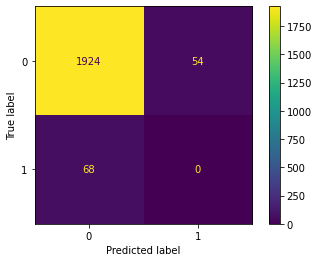

In [110]:
cm = confusion_matrix(y_test,  predictions['stratif'])
cd = ConfusionMatrixDisplay( cm , display_labels=['0' , '1'] )
cd.plot()

Αυτό είναι λογικό, καθώς τα δεδομένα είναι ακραία imbalanced και δεν υπάρχει περιθώριο "εκπαίδευσης" του ταξινομητή, πόσο μάλλον του dummy classifier που είναι αδύναμος από την φύση του. Οπότε ναι μεν η μετρική f1-micro δίνει υψηλή απόδοση αλλά δεν πρέπει να την εμπιστευτούμε. 

##MLP

In [111]:
from sklearn.neural_network import MLPClassifier

Συνεχίζουμε με multi-layer perceptron: 

In [112]:
clf = MLPClassifier()
clf.fit(X_train, y_train)
preds_MLP = clf.predict(X_test)

#print("F1-score for MLP is", f1_score(y_test, preds_MLP, average = 'micro' ), '\n') 

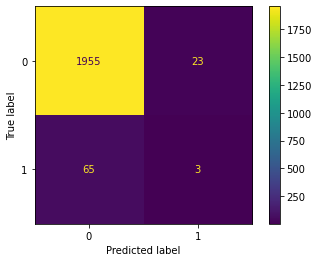

In [113]:
cm = confusion_matrix(y_test,  preds_MLP)
cd = ConfusionMatrixDisplay( cm , display_labels=['0' , '1'] )
cd.plot()



Και εδώ βλέπουμε καλύτερα αποτελέσματα σε σχέση με τους προηγούμενους classifiers. Συγκεκριμένα βλέπουμε καλύτερη απόδοση στην κλάση 0, πιθανότατα γιατί ο classifier έχει μάθει καλύτερα να διακρίνει entries από αυτή την κλάση, αφού το dataset μας είναι imbalanced με κλίση προς την κλάση 0.


##SVM

Ομοίως με support vector machine:

In [ ]:
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC 

# "Support vector classifier"

model_svm_linear = LinearSVC()

model_svm_linear.fit(X_train, y_train)

preds_SVM_linear = model_svm_linear.predict(X_test)

#print("F1-score for SVM is", f1_score(y_test, preds_SVM_linear, average = 'micro' )) 

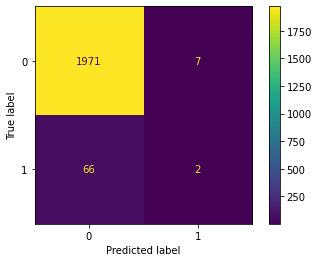

In [115]:
cm = confusion_matrix(y_test,  preds_SVM_linear)
cd = ConfusionMatrixDisplay( cm , display_labels=['0' , '1'] )
cd.plot()

Στον συγκεκριμένο classifier βλέπουμε την καλύτερη απόδοση μέχρι τώρα.

In [116]:
model_svm_rbf = SVC( kernel= 'rbf')

model_svm_rbf.fit(X_train, y_train)

preds_SVM_rbf = model_svm_rbf.predict(X_test)

In [117]:
model_svm_poly = SVC(kernel = 'poly')

model_svm_poly.fit(X_train, y_train)

preds_SVM_poly = model_svm_poly.predict(X_test)

##Σύγκριση ταξινομητών

{'uniform': 0.5048875855327468, 'const_0': 0.9628543499511242, 'const_1': 0.03714565004887586, 'stratif': 0.9369501466275659, 'frequent': 0.9628543499511242, 'MLP': 0.8963831867057672, 'SVM_linear': 0.9613880742913001, 'SVM_rbf': 0.9628543499511242, 'SVM_poly': 0.9628543499511242}
[0.49071358748778104, 0.9667644183773216, 0.033235581622678395, 0.9403714565004888, 0.9667644183773216, 0.956989247311828, 0.9643206256109482, 0.9667644183773216, 0.9667644183773216]


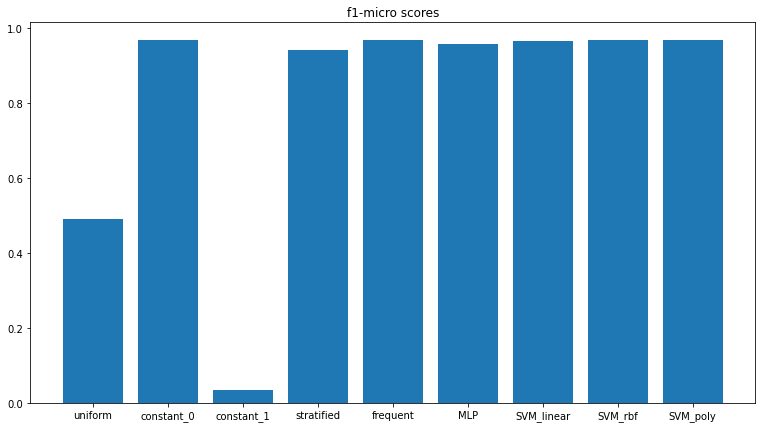

In [118]:
F1_micro_scores = {}
for i in predictions : 
   F1_micro_scores[i] = f1_score(y_test, predictions[i], average='micro')

F1_micro_scores["MLP"]=f1_score(y_test, preds_MLP, average='micro' )
F1_micro_scores["SVM_linear"]=f1_score(y_test, preds_SVM_linear, average='micro' ) 
F1_micro_scores["SVM_rbf"]=f1_score(y_test, preds_SVM_rbf, average='micro' ) 
F1_micro_scores["SVM_poly"]=f1_score(y_test, preds_SVM_poly, average='micro' ) 

print(F1_scores)
F1_scoreslist=list(F1_micro_scores.values())   # το κάνω list για να περάσει ως παράμετρος

print(F1_scoreslist)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(13,7))
classifiers = ['uniform', 'constant_0', 'constant_1', 'stratified' , 'frequent',  'MLP', 'SVM_linear' , 'SVM_rbf' , 'SVM_poly']
ax.bar(classifiers , F1_scoreslist, width=0.8)
ax.set_title('f1-micro scores')

plt.show()

{'uniform': 0.3566426053787842, 'const_0': 0.49155069582504973, 'const_1': 0.03216650898770104, 'stratif': 0.48463476070528966, 'frequent': 0.49155069582504973, 'MLP': 0.5209093908656456, 'SVM_linear': 0.5168831168831168, 'SVM_rbf': 0.49155069582504973, 'SVM_poly': 0.49155069582504973}


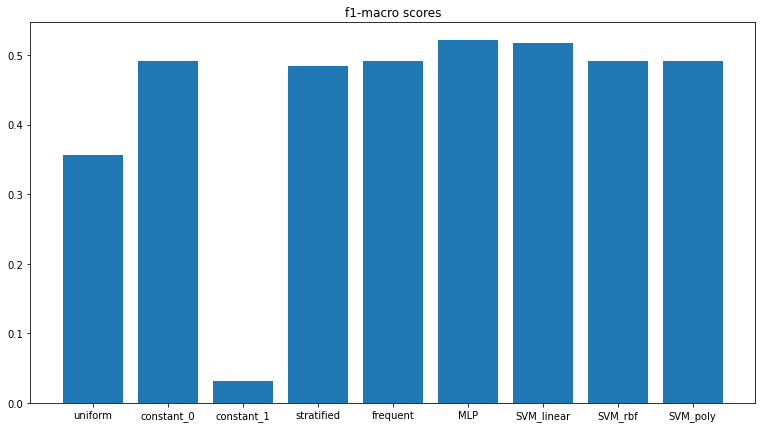

In [119]:
#macro
F1_macro_scores={}
for i in predictions : 
   F1_macro_scores[i] = f1_score(y_test, predictions[i], average='macro')

F1_macro_scores["MLP"]=f1_score(y_test, preds_MLP, average='macro' )
F1_macro_scores["SVM_linear"]=f1_score(y_test, preds_SVM_linear, average='macro' ) 
F1_macro_scores["SVM_rbf"]=f1_score(y_test, preds_SVM_rbf, average='macro' ) 
F1_macro_scores["SVM_poly"]=f1_score(y_test, preds_SVM_poly, average='macro' ) 


print(F1_macro_scores)
f1_macro_scoreslist=list(F1_macro_scores.values())   # το κάνω list για να περάσει ως παράμετρος


import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(13,7))
classifiers = ['uniform', 'constant_0', 'constant_1', 'stratified' , 'frequent',  'MLP', 'SVM_linear', 'SVM_rbf' , 'SVM_poly']
ax.bar(classifiers , f1_macro_scoreslist, width=0.8)
ax.set_title('f1-macro scores')

plt.show()

Παρατηρούμε ότι η μετρική macro δίνει χειρότερη απόδοση (47-55%) σε σχέση με την micro (90-94%). Λογικό , αφού η micro υπολογίζει τον συνολικό αριθμό των TP,FN,FP και ύστερα τον αρμονικό μέσο των precision,recall. Η macro από την άλλη υπολογίζει ξεχωριστά για κάθε κλάση τα precision-recall και μετά παίρνει τον μέσο όρο. Επομένως, σε ένα imbalanced dataset η macro αστοχεί αφού η κατανομή μεταξύ των δύο κλάσεων είναι άνιση. Οι αποδόσεις των dummy clasifiers υπάρχουν στο Plot για λόγους πληρότητας.  

Συμπερασματικά, αγνοώντας τον dummy classifiers(αφού δεν είναι σοβαρό μοντέλο ταξινόμησης) παρατηρούμε ότι τα SVM κυμαίνονται στα ίδια επίπεδα.

|method | uniform  | constant0| constant1| stratified  | frequent   | MLP| SVM_linear|SVM_rbf| SVM_poly|
|-----|-----|--------|-------|-------|-------|-------|-------|-------|-------|
|macro | 0.3677   |0.49    |0.035  |0.483  |0.49   |0.53   |   0.51|  0.49 | 0.49  |
|micro | 0.50     | 0.96   | 0.037 | 0.93  | 0.96  | 0.896 | 0.961 | 0.963  | 0.963  |

In [120]:
F1_macro_scoreslist =list(np.array([F1_macro_scores["MLP"] , F1_macro_scores["SVM_linear"] , F1_macro_scores["SVM_rbf"] , F1_macro_scores["SVM_poly"] ]))

F1_micro_scoreslist =list(np.array([F1_micro_scores["MLP"] , F1_micro_scores["SVM_linear"] , F1_micro_scores["SVM_rbf"] , F1_micro_scores["SVM_poly"] ]))

Και επειδή έχουμε binary classification, μπορούμε να χρησιμοποιήσουμε Matthews correlation coefficient για να δούμε πόσο ποιοτική είναι η κάθε μέθοδος ταξινόμησης. Βλέπουμε ότι οι τιμές των MLP, SVM κυμαίνονται γύρω από το 0 φανερώνοντας πολύ μέτριες προβλέψεις.

In [121]:
for i  in predictions : print("MCC for", i ,  matthews_corrcoef(y_test, predictions[i])) 
print()
print("MCC for MLP", ':',  matthews_corrcoef(y_test, preds_MLP), '\n') 
print("MCC for SVM linear", ':',  matthews_corrcoef(y_test, preds_SVM_linear)) 
print("MCC for SVM rbf", ':',  matthews_corrcoef(y_test, preds_SVM_rbf))
print("MCC for SVM poly", ':',  matthews_corrcoef(y_test, preds_SVM_poly))

MCC for uniform 0.0016475430255551739
MCC for const_0 0.0
MCC for const_1 0.0
MCC for stratif -0.030527660665546748
MCC for frequent 0.0

MCC for MLP : 0.05199379030213715 

MCC for SVM linear : 0.07008012612040027
MCC for SVM rbf : 0.0
MCC for SVM poly : 0.0


# Εποπτική Βελτιστοποίηση

##Προεπεξεργασία

In [122]:
#dff

In [123]:
#df.where(df >1 ).stack().to_dict()

###Κανονικοποίηση

Τα δεδομένα δεν είναι κανονικοποιημένα οπότε θα χρησιμοποιήσουμε ενα minmaxScaler.

In [124]:
from scipy import stats as st
import numpy as np

from sklearn import preprocessing

# το ίδιο με  min max scaling
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
#print(X_train_minmax, "\n")
X_test_minmax = min_max_scaler.transform(X_test)
#print(X_test_minmax)
# παρατηρούμε ότι στο test set έχουμε τιμές εκτός [0,1] γιατί στο train set το min ήταν -1 και το max 2

print(X_test_minmax.mean(axis=0))
print(X_test_minmax.std(axis=0))

[5.19267495e-01 5.58064537e-01 5.52923427e-01 6.07974499e-01
 6.07942583e-01 9.96076246e-01 7.58178481e-01 8.08925756e-01
 4.16104786e-01 7.47471529e-01 1.99745573e-01 1.95492436e-01
 6.29615687e-01 1.71164233e-02 1.18209613e-01 1.89918689e-01
 1.89932159e-01 1.89964371e-01 2.19500480e-01 3.23414823e-01
 2.44379290e-04 1.85428921e-01 2.54714533e-01 1.80233636e-02
 8.48070979e-01 7.85131667e-01 7.85140010e-01 2.17621771e-01
 5.42047800e-01 7.07206910e-05 2.64155331e-01 4.99866194e-01
 5.59562784e-12 7.42934183e-04 6.30863544e-01 1.16493751e-03
 1.13233005e-01 8.86766995e-01 7.93943638e-03 3.92466637e-01
 5.78713691e-03 1.85360398e-01 2.02026189e-01 4.02721204e-01
 1.45706472e-01 9.82735884e-04 5.73449913e-04 2.09162354e-01
 9.03829391e-02 4.00765459e-02 3.91117802e-04 4.09747060e-01
 1.23440901e-03 8.15932410e-01 4.12611400e-01 5.33148389e-01
 1.26721497e-01 4.17827608e-04 4.71993882e-03 9.19859391e-02
 4.69178712e-01 2.77290621e-01 4.52195850e-03 7.70075515e-01
 7.36092421e-01 3.314627

###Μείωση διαστάσεων

Θα δοκιμάσω variance threshold, PCA και FA.
Θα επεξεργαστούμε λίγο τα δεδομένα για να βρούμε τις διακυμάνσεις ώστε αργότερα στο pipeline να ξέρουμε το πεδίο των παραμέτρων που θα προσθέσουμε.

####Variance threshold

In [125]:
Xvar = np.var(X_train_minmax, axis=0)
Xvar

array([0.00383723, 0.00424216, 0.00372216, 0.00033203, 0.00033137,
       0.00021593, 0.0001458 , 0.00015317, 0.00014228, 0.00013469,
       0.10502694, 0.06772867, 0.00044659, 0.01182636, 0.01872348,
       0.00113073, 0.00113855, 0.00113859, 0.0021327 , 0.00032302,
       0.00036637, 0.00169747, 0.00193529, 0.00020838, 0.00016395,
       0.0002955 , 0.00029844, 0.00014435, 0.08309902, 0.00020947,
       0.00013198, 0.00063807, 0.00020947, 0.00083185, 0.00015884,
       0.00040299, 0.00291002, 0.00291002, 0.00109259, 0.00028915,
       0.00021173, 0.00167197, 0.00191012, 0.00020294, 0.01008762,
       0.00091395, 0.00084   , 0.10627073, 0.0641117 , 0.00133352,
       0.00020947, 0.00114903, 0.00095982, 0.00352258, 0.04122875,
       0.04744857, 0.01888236, 0.0003878 , 0.00259821, 0.00252755,
       0.00183147, 0.00015029, 0.00405852, 0.04386451, 0.00016511,
       0.0002168 , 0.00346567, 0.00067343, 0.00020875, 0.00077805,
       0.07973956, 0.11526449, 0.00017011, 0.08766058, 0.00015

Η πλειοψηφία των διασπορών της κάθε στήλης του κανονικοποιημένου X_train είναι σχεδόν μηδενική, οπότε για threshold το 0.001 παρατηροούμε ότι η διάσταση των features μειώνεται στο μισό. 

In [126]:
from sklearn.feature_selection import VarianceThreshold

#print(X_train)
# αρχικοποιούμε έναν selector
selector = VarianceThreshold(threshold=0.001)
# όπως κάναμε και με τους ταξινομητές τον κάνουμε fit στα δεδομένα εκπαίδευσης
train_reduced = selector.fit_transform(X_train_minmax)
#print(train_reduced)
mask = selector.get_support()
#print(mask)

print(X_test.shape)

#test_reduced = selector.transform(X_test_minmax)
#print(test_reduced)
print(train_reduced.shape)

(2046, 94)
(4773, 45)


####PCA

(4773, 94)
(4773,)

The first component contains 16.48% of the total information and the second one contains 13.01%
In total the 2 components contains 29.49% of the total information



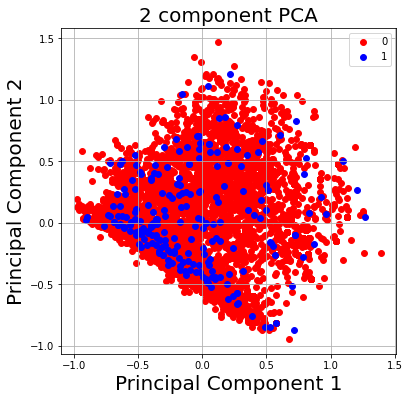

In [127]:
from sklearn.decomposition import PCA

#SMOTE
#from imblearn.over_sampling import SMOTE

#smote= SMOTE()
#X_train_smote, y_train_smote = smote.fit_resample(X_train_minmax , y_train)

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter

print(X_train_minmax.shape)
print(y_train.shape)

#τα κάνω oversampler για να τσεκάρω αν αλλάζει κάτι στο plot
ros = RandomOverSampler(random_state = 0)
X_train_over, y_train_over = ros.fit_resample(X_train_minmax,y_train)

pca = PCA(n_components=2)

#principalComponents = pca.fit_transform(X_train_smote)
principalComponents = pca.fit_transform(X_train_over)

print()
print("The first component contains {:.2f}% of the total information and the second one contains {:.2f}%".format( (100*pca.explained_variance_ratio_[0]),(100*pca.explained_variance_ratio_[1]) ) )
print("In total the 2 components contains {:.2f}% of the total information".format((100*pca.explained_variance_ratio_[0])+(100*pca.explained_variance_ratio_[1])) )
print()

principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df['Bankrupt?'] ], axis = 1)

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 20)
ax.set_ylabel('Principal Component 2', fontsize = 20)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Bankrupt?'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 35)
ax.legend(targets)
ax.grid()

####FA

In [128]:
dfff = pd.DataFrame(X_train_minmax)
#dfff

In [129]:
!pip install factor-analyzer
# Instantiate factor analysis object
from factor_analyzer.factor_analyzer import FactorAnalyzer 
fa = FactorAnalyzer(rotation='varimax')
fa.fit(dfff)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev


array([ 1.27851607e+01,  6.83102343e+00,  6.37313428e+00,  4.68453306e+00,
        4.30200177e+00,  3.12459405e+00,  2.90122635e+00,  2.66167763e+00,
        2.03307563e+00,  1.98486674e+00,  1.85342306e+00,  1.69302374e+00,
        1.58480795e+00,  1.53129005e+00,  1.42192052e+00,  1.38039922e+00,
        1.36761914e+00,  1.28591257e+00,  1.21989724e+00,  1.16535913e+00,
        1.13327641e+00,  1.12991659e+00,  1.07965033e+00,  1.05719800e+00,
        1.04605816e+00,  1.03453669e+00,  1.01745325e+00,  1.00591846e+00,
        9.97799789e-01,  9.87021647e-01,  9.82129460e-01,  9.69467941e-01,
        9.52732745e-01,  9.41264861e-01,  9.36832151e-01,  9.33592978e-01,
        9.07416534e-01,  8.76280338e-01,  8.70052836e-01,  8.51817879e-01,
        8.30538721e-01,  8.19859784e-01,  8.05879804e-01,  7.55481101e-01,
        7.10948030e-01,  6.95025366e-01,  6.66008443e-01,  6.45683861e-01,
        5.64934457e-01,  5.36263852e-01,  5.01670249e-01,  4.88112114e-01,
        4.46865978e-01,  

Ένα κριτήριο για να επιλέξω καλά factors είναι να επιλέξω τα factors που αντιστοιχούν σε eigenvalues > 1. Οπότε κάνω το παρακάτω plot: 

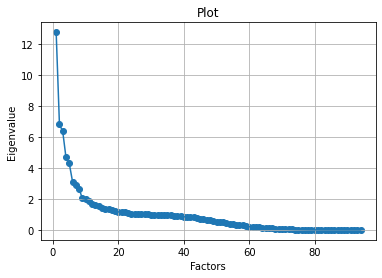

In [130]:
plt.scatter(range(1, dfff.shape[1]+1), ev)
plt.plot(range(1, dfff.shape[1]+1), ev)
plt.title('Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Από το plot βλέπουμε το αποτύπωμα 94 eigenvalues, όσα και τα features δηλαδή. Προφανώς δεν θέλουμε αριθμό από factors που να πλησιάζει των αριθμό των features, αφού τα features εκφράζονται ως γραμμικός συνδυασμός των factors.Οπότε θα επιλέξω factors των οποίων οι eigenvalues είναι μεγαλύτερες από 1. 
Άρα 10 factors. 
Στην συνέχεια φυσικά δεν χρειάζεται αυτή η διαδικασία αφού το gridsearch βρίσκει μόνο του τις υπερπαραμέτρους. Το παραπάνω ήταν για λόγους επεξήγησης, αφού με τα Pipelines δεν χρειάζεται να βρω χειροκίνητα τον αριθμό των factors. 

###Εξισορρόπηση δεδομένων

Επειδή οι ταξινομητές μου είναι SVM, MLP θα χρησιμοποιήσω oversampling. 
Ένας ακόμα λόγος είναι το πολύ μικρό πλήθος δειγμάτων κλάσης 1 (bunkrupt), από το οποίο θα προέκυπτε ένα πολύ μικρό train dataset. Θα χρησιμοποιήσω randomoversampler και SMOTE και συγκρίνω στο τέλος. Η διαφορά των δύο είναι ότι ο πρώτος απλά διπλασιάζει την minority class έως ότου ισορροπήσουν τα δείγματα των δύο κλάσεων,ουσιαστικά φορτώνει τα ίδια δείγματα ξανά και ξανά , ενώ η μέθοδος SMOTE δημιουργεί νέα δείγματα που αντιστοιχούν στη minority class. 

In [131]:
print(df['Bankrupt?'].value_counts())  #δείγματα που αντιστοιχουν ανά κλάση

0    6599
1     220
Name: Bankrupt?, dtype: int64


In [132]:
!pip install -U imbalanced-learn

In [133]:
#randomoversampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter

print(X_train.shape)
print(y_train.shape)

ros = RandomOverSampler(random_state = 0)
x_train_over, y_train_over = ros.fit_resample(X_train,y_train)


freq=Counter(y_train_over)
print(freq)            #dictionary με συχνότητες

print(x_train_over.shape)
print(y_train_over.shape)

(4773, 94)
(4773,)
Counter({0: 4621, 1: 4621})
(9242, 94)
(9242,)


In [134]:
#SMOTE
from imblearn.over_sampling import SMOTE, ADASYN

smote= SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

freq=Counter(y_train_over)
print(freq)            #dictionary με συχνότητες

print(X_train_smote.shape)
print(y_train_smote.shape)

Counter({0: 4621, 1: 4621})
(9242, 94)
(9242,)


Βλέπουμε πως πλέον η αναλογία των κλάσεων είναι 1:1 και συνεπώς το training set είναι ισορροπημένο. Το Oversamping έγινε μόνο στο training set, αφού το test set θέλουμε να μείνει αναλοίωτο.

#Βελτιστοποίηση ταξινομητών με χρήση pipelines

Στην συνέχεια θα χρησιμοποιήσουμε pipelines για να μελετήσουμε ειδικότερα την επίδραση διαφορετικών βελτιστοποιήσεων στην απόδοση των ταξινομητών βρίσκοντας ποιες υπερπαράμετροι είναι βέλτιστες.



Στο βήμα αυτό θα κάνουμε tuning υπερπαραμέτρων ώστε να βρούμε τους κατάλληλους συνδυασμούς που θα βελτιστοποιήσουν τους ταξινομητές μας(MLP,SVM). Κάνω Grid-search με 5-fold-cross validation, το οποίο κοστίζει σε χρόνο. Κάνω cross validation με μετρική micro γιατί ενδείκνυται για imbalanced δεδομένα. Ωστόσο η τελική εκτύπωση της απόδοσης είναι σε macro.

Στην προεπεξεργασία τυπώσαμε το variance των δεδομένων μας και παρατηρούμε ότι οι τιμές της διασποράς είναι κοντά στο 0. Τo variance thresholding μπορεί να θεωρηθεί ως υπερπαράμετρος, την οποία αρχικά εισάγαμε ως μέρος της αρχιτεκτονικής του pipeline αλλά παρατηρήσαμε πως πάντα επιλεγόταν threshold κάτω από το min των τιμών, δηλαδή τα αποτελέσματα είναι χειρότερα κάνοντας variance thresholding. Οπότε δεν αποτελεί χρήσιμη υπερπαράμετρο στο συγκεκριμένο πρόβλημα γιαυτό την αφαιρούμε.

Η στρατηγική εύρεσης υπερπαραμέτρων που θα χρησιμοποιήσω είναι η ακόλουθη:
Για κάθε ταξινομητή (MLP , SVM_linear , SVM_rbf , SVM_poly) για δύο διαφορετικές τεχνικές oversampling(randomoversampling και SMOTE) και δύο διαφορετικές τεχνικές dimensionality reduction (pca , fa) υπολογίζω τις υπερπαραμέτρους. Στη συνέχεια αναλύω πως επηρεάζει κάθε τεχνική την απόδοση και στο τέλος συγκρίνω αναλυτικά όλους τους ταξινομητές.


Θα βελτιστοποιήσω το MLP με Optuna ενώ το SVM με scikit learn. 

In [135]:
!pip install --upgrade imbalanced-learn

In [136]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import FactorAnalysis

from sklearn.decomposition import PCA

##MLP

In [137]:
!pip install --upgrade optuna

In [138]:
from sklearn.neural_network import MLPClassifier
import optuna

In [139]:
f1_macro_optimized_MLP = []

In [140]:
def objective(trial, x_train, y_train , x_test , y_test, dr ):

    if( dr == 0):                                              #pca
      pca = PCA(n_components=78)
      x_train = pca.fit_transform(x_train)
      x_test = pca.transform(x_test)
    else:                                                      #fa
      fa = FactorAnalyzer(rotation='varimax')
      x_train = fa.fit_transform(x_train)
      x_test = fa.transform(x_test)

    n_layers = trial.suggest_int('n_layers', 1, 2 )           #number of layers

    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_{i}', 10, 20 ))      #space of neurons per layer


    #alpha=trial.suggest_loguniform('alpha',1e-4,100)     # penalty  parameter.
    #tol=trial.suggest_float('tol',1e-8,1e-4)             # tol

    clf = MLPClassifier(hidden_layer_sizes=tuple(layers))

    clf.fit(x_train, y_train)

    score = clf.score(x_test, y_test)

    f1_macro_optimized_MLP.append(score)

    return score

In [141]:
#randomOverSampler
ros = RandomOverSampler(random_state = 0)
x_train_over, y_train_over = ros.fit_resample(X_train_minmax,y_train)

#SMOTE
smote= SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(X_train_minmax, y_train)


In [142]:
#for RandomOversampling
study = optuna.create_study(direction='maximize')
print("THIS IS PCA")
study.optimize(lambda trial: objective(trial, x_train_over, y_train_over, X_test_minmax , y_test, 0) , n_trials=3) 
print()
print("THIS IS FA")
study.optimize(lambda trial: objective(trial, x_train_over, y_train_over, X_test_minmax , y_test, 1) , n_trials=3) 


[I 2021-11-22 08:37:34,283] A new study created in memory with name: no-name-798c452b-2c1b-41ec-abfb-8245da849dfd


THIS IS PCA


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

[I 2021-11-22 08:37:41,141] Trial 0 finished with value: 0.9486803519061584 and parameters: {'n_layers': 2, 'n_units_0': 11, 'n_units_1': 16}. Best is trial 0 with value: 0.9486803519061584.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

[I 2021-11-22 08:37:46,057] Trial 1 finished with value: 0.9120234604105572 and parameters: {'n_layers': 1, 'n_units_0': 11}. Best is trial 0 with value: 0.9486803519061584.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged ye


THIS IS FA


[I 2021-11-22 08:37:58,643] Trial 3 finished with value: 0.4521016617790811 and parameters: {'n_layers': 2, 'n_units_0': 16, 'n_units_1': 17}. Best is trial 2 with value: 0.9506353861192571.
[I 2021-11-22 08:38:01,044] Trial 4 finished with value: 0.9198435972629521 and parameters: {'n_layers': 1, 'n_units_0': 15}. Best is trial 2 with value: 0.9506353861192571.
[I 2021-11-22 08:38:03,315] Trial 5 finished with value: 0.9349951124144672 and parameters: {'n_layers': 1, 'n_units_0': 13}. Best is trial 2 with value: 0.9506353861192571.


In [143]:
#for SMOTE
study = optuna.create_study(direction='maximize')
print("THIS IS PCA")
study.optimize(lambda trial: objective(trial, x_train_smote, y_train_smote, X_test_minmax, y_test ,0) , n_trials=3) 
print()
print("THIS IS FA")
study.optimize(lambda trial: objective(trial, x_train_smote, y_train_smote, X_test_minmax, y_test ,1) , n_trials=3) 

[I 2021-11-22 08:38:03,338] A new study created in memory with name: no-name-98748016-5408-4f58-b2bf-cf897bcfacd0


THIS IS PCA


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

[I 2021-11-22 08:38:08,116] Trial 0 finished with value: 0.9188660801564027 and parameters: {'n_layers': 1, 'n_units_0': 16}. Best is trial 0 with value: 0.9188660801564027.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

[I 2021-11-22 08:38:18,645] Trial 1 finished with value: 0.9501466275659824 and parameters: {'n_layers': 2, 'n_units_0': 17, 'n_units_1': 14}. Best is trial 1 with value: 0.9501466275659824.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged ye


THIS IS FA


[I 2021-11-22 08:38:28,055] Trial 3 finished with value: 0.38758553274682306 and parameters: {'n_layers': 2, 'n_units_0': 10, 'n_units_1': 11}. Best is trial 1 with value: 0.9501466275659824.
[I 2021-11-22 08:38:30,063] Trial 4 finished with value: 0.28885630498533726 and parameters: {'n_layers': 1, 'n_units_0': 10}. Best is trial 1 with value: 0.9501466275659824.
[I 2021-11-22 08:38:32,315] Trial 5 finished with value: 0.19696969696969696 and parameters: {'n_layers': 2, 'n_units_0': 16, 'n_units_1': 14}. Best is trial 1 with value: 0.9501466275659824.


##SVM

#dimensionality reduction params
- vthreshold 
- pca_n_components 
- fa_n_components 

#oversamling techinques
- randomoversampler
- smote = SMOTE()

In [144]:
f1_macro_scoreslist_SVM=[]

In [145]:
def gridsearch_class_report(classifier, param_grid, pipe, train, train_labels, test, test_labels):

                                                # X_train_minmax , y_train , X_test_minmax , y_test

    # We will use 5 fold validation
    estimator = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)

    %time estimator.fit(train, train_labels)
    
    
    preds = estimator.predict(test)                         #test = X_test_minmax
    
    print(classification_report(test_labels, preds))

    print(estimator.best_estimator_)
    print(estimator.best_params_)

    #f1_acc_optimized[classifier] = rep_dict['accuracy']

    # Compute confusion matrix
    pred = estimator.predict(test)
    print("Confusion matrix\n")
    cnf_matrix = confusion_matrix(test_labels, pred)
    print(classifier, "Classifier", )
    print(cnf_matrix, end='\n\n')

    rep_dict = classification_report(test_labels, preds, output_dict = True)

    f1_macro_scoreslist_SVM.append(rep_dict['weighted avg']['f1-score'])
    #f1_macro_optimized[classifier] = mylist 

###Linear Kernel

Για αρχή δοκιμάζω τα παρακάτω διαστήματα για τις υπερπαραμέτρους:

In [ ]:
#dimensionality reduction params
vthreshold = [0.001, 0.002 , 0.003]

#linear_svm params
loss = ["hinge", "squared_hinge"]        # default ‘squared_hinge’
tol = [1e-2, 1e-8, 1e-14]                 # default 1e-4
c = [0.5, 1 , 1.5]

linear_svm = LinearSVC()
selector = VarianceThreshold()
sampler = RandomOverSampler()


param_grid = dict(selector__threshold=vthreshold , linearsvm__loss = loss, linearsvm__tol = tol , linearsvm__C = c)

pipe = Pipeline(steps=[('sampler' , sampler) , ('selector', selector), ('linearsvm', linear_svm) ], memory = 'tmp')

gridsearch_class_report('SVM_linear', param_grid, pipe, X_train_minmax, y_train, X_test_minmax, y_test)

In [ ]:
#μειώνω το tol και αυξάνω το C

#dimensionality reduction params
vthreshold = [0.001, 0.002 , 0.003]

#linear_svm params
loss = ["hinge", "squared_hinge"]       
tol = [ 1e-10, 1e-14, 1e-16]               
c = [ 70, 72 , 73 , 74 ]

linear_svm = LinearSVC()
selector = VarianceThreshold()
sampler = RandomOverSampler()


param_grid = dict(selector__threshold=vthreshold , linearsvm__loss = loss, linearsvm__tol = tol , linearsvm__C = c)

pipe = Pipeline(steps=[('sampler' , sampler) , ('selector', selector), ('linearsvm', linear_svm) ], memory = 'tmp')

gridsearch_class_report('SVM_linear', param_grid, pipe, X_train_minmax, y_train, X_test_minmax, y_test)


Μετά από πολλές δοκιμές(μετατοπίζοντας το διάστημα των αντίστοιχων υπερπαραμέτρων) οι βέλτιστοι είναι 73-75 για το C, tol = 1e-10, loss=squared hinge . 

δοκιμάζω με SMOTE oversampling τώρα:

In [ ]:
#dimensionality reduction params
vthreshold = [0.001, 0.002 , 0.003]

#linear_svm params
loss = ["hinge", "squared_hinge"]      
tol = [ 1e-8, 1e-10, 1e-14, 1e-16]         
c = [ 70, 72 , 73 , 74 ]

linear_svm = LinearSVC()
selector = VarianceThreshold()
sampler = SMOTE()

param_grid = dict(selector__threshold=vthreshold , linearsvm__loss = loss, linearsvm__tol = tol , linearsvm__C = c)

pipe = Pipeline(steps=[('sampler' , sampler) , ('selector', selector), ('linearsvm', linear_svm) ], memory = 'tmp')

gridsearch_class_report('SVM_linear', param_grid, pipe, X_train_minmax, y_train, X_test_minmax, y_test) 


Με SMOTE παρατηρούμε βελτιώθηκε η απόδοση. 

Ώστοσο, όπως αναφέραμε και στην εισαγωγή το gridsearch επιλέγει πάντοτε τιμή vth < min(X.var) οπότε δεν προκύπτει ποτε καλή απόδοση. 

Γιαυτό προχωράμε με τη μέθοδο PCA:

In [149]:
selector = PCA()

#dimensionality reduction params
pca_components = [ 50 , 60 , 70 , 80 ]

#linear_svm params
loss = ["hinge", "squared_hinge"]        
tol = [1e-4, 1e-10, 1e-14, 1e-16]             
c = [ 72, 73 , 75]

linear_svm = LinearSVC()
sampler = RandomOverSampler()

param_grid = dict(selector__n_components=pca_components , linearsvm__loss = loss, linearsvm__tol = tol , linearsvm__C = c)

pipe = Pipeline(steps=[ ('sampler', sampler), ('selector', selector), ('linearsvm' , linear_svm) ] , memory = 'tmp')

gridsearch_class_report('SVM_linear', param_grid, pipe, X_train_minmax, y_train, X_test_minmax, y_test)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
CPU times: user 5.27 s, sys: 656 ms, total: 5.93 s
Wall time: 5min 19s
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1978
           1       0.17      0.76      0.28        68

    accuracy                           0.87      2046
   macro avg       0.58      0.82      0.60      2046
weighted avg       0.96      0.87      0.91      2046

Pipeline(memory='tmp',
         steps=[('sampler', RandomOverSampler()),
                ('selector', PCA(n_components=70)),
                ('linearsvm', LinearSVC(C=72))])
{'linearsvm__C': 72, 'linearsvm__loss': 'squared_hinge', 'linearsvm__tol': 0.0001, 'selector__n_components': 70}
Confusion matrix

SVM_linear Classifier
[[1726  252]
 [  16   52]]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Κάνουμε την ίδια δουλεια με SMOTE

In [150]:
selector = PCA()

#dimensionality reduction params
pca_components = [ 50 , 60 , 70 , 80 ]

#linear_svm params
loss = ["hinge", "squared_hinge"]       
tol = [1e-3, 1e-10, 1e-14, 1e-16]           
c = [ 72, 73 , 75]

linear_svm = LinearSVC()
sampler = SMOTE()

param_grid = dict(selector__n_components=pca_components , linearsvm__loss = loss, linearsvm__tol = tol , linearsvm__C = c)

pipe = Pipeline(steps=[ ('sampler', sampler), ('selector', selector), ('linearsvm' , linear_svm) ] , memory = 'tmp')

gridsearch_class_report('SVM_linear', param_grid, pipe, X_train_minmax, y_train, X_test_minmax, y_test)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
CPU times: user 4.88 s, sys: 528 ms, total: 5.41 s
Wall time: 4min 42s
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1978
           1       0.18      0.72      0.28        68

    accuracy                           0.88      2046
   macro avg       0.58      0.80      0.61      2046
weighted avg       0.96      0.88      0.91      2046

Pipeline(memory='tmp',
         steps=[('sampler', SMOTE()), ('selector', PCA(n_components=80)),
                ('linearsvm', LinearSVC(C=73, tol=0.001))])
{'linearsvm__C': 73, 'linearsvm__loss': 'squared_hinge', 'linearsvm__tol': 0.001, 'selector__n_components': 80}
Confusion matrix

SVM_linear Classifier
[[1748  230]
 [  19   49]]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Ας δούμε με factor analysis

In [151]:
selector = FactorAnalysis()

#dimensionality reduction params
fa_components = [ 50 , 60 , 70 , 80 ]

#linear_svm params
loss = ["hinge", "squared_hinge"]     
tol = [1e-3, 1e-10, 1e-14]           
c = [ 72 , 73 , 75]

linear_svm = LinearSVC()
sampler = RandomOverSampler()

param_grid = dict(selector__n_components=fa_components , linearsvm__loss = loss, linearsvm__tol = tol , linearsvm__C = c)

pipe = Pipeline(steps=[ ('sampler', sampler), ('selector', selector), ('linearsvm' , linear_svm) ] , memory = 'tmp')

gridsearch_class_report('SVM_linear', param_grid, pipe, X_train_minmax, y_train, X_test_minmax, y_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: user 17.8 s, sys: 11.2 s, total: 28.9 s
Wall time: 8min 55s
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1978
           1       0.15      0.72      0.25        68

    accuracy                           0.85      2046
   macro avg       0.57      0.79      0.58      2046
weighted avg       0.96      0.85      0.90      2046

Pipeline(memory='tmp',
         steps=[('sampler', RandomOverSampler()),
                ('selector', FactorAnalysis(n_components=60)),
                ('linearsvm', LinearSVC(C=75, loss='hinge', tol=1e-14))])
{'linearsvm__C': 75, 'linearsvm__loss': 'hinge', 'linearsvm__tol': 1e-14, 'selector__n_components': 60}
Confusion matrix

SVM_linear Classifier
[[1699  279]
 [  19   49]]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



δοκιμάζω και με SMOTE

In [152]:
selector = FactorAnalysis()

#dimensionality reduction params
fa_components = [ 50 , 60 , 70 , 80 ]

#linear_svm params
loss = ["hinge", "squared_hinge"]      
tol = [1e-3, 1e-10, 1e-14 ]              
c = [ 72 , 73 , 75]

linear_svm = LinearSVC()
sampler = SMOTE()

param_grid = dict(selector__n_components=fa_components , linearsvm__loss = loss, linearsvm__tol = tol , linearsvm__C = c)

pipe = Pipeline(steps=[ ('sampler', sampler), ('selector', selector), ('linearsvm' , linear_svm) ] , memory = 'tmp')

gridsearch_class_report('SVM_linear', param_grid, pipe, X_train_minmax, y_train, X_test_minmax, y_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: user 24.1 s, sys: 16.2 s, total: 40.2 s
Wall time: 8min 35s
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1978
           1       0.16      0.68      0.25        68

    accuracy                           0.87      2046
   macro avg       0.57      0.78      0.59      2046
weighted avg       0.96      0.87      0.91      2046

Pipeline(memory='tmp',
         steps=[('sampler', SMOTE()),
                ('selector', FactorAnalysis(n_components=80)),
                ('linearsvm', LinearSVC(C=75, loss='hinge', tol=0.001))])
{'linearsvm__C': 75, 'linearsvm__loss': 'hinge', 'linearsvm__tol': 0.001, 'selector__n_components': 80}
Confusion matrix

SVM_linear Classifier
[[1731  247]
 [  22   46]]



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Συμπεράσματα για linear kernel: 
- αφού βρούμε τις κατάλληλες υπερπαραμέτρους loss,tol,C το μοντέλο ισορροπεί γύρω από μία συγκεκριμένη απόδοση. Δηλαδή μικροαλλαγές δεν επιφέρουν ουσιαστική αλλαγή(βελτίωση) στην απόδοση και αυτό οφείλεται στο ότι τα δεδομένα μας δεν είναι γραμμικά διαχωρίσιμα.
- καλύτερη απόδοση (της τάξεως του 1-2%) εμφανίζεται πάντα με SMOTE εξισορρόπηση ανεξάρτητα από την επιλογή dimensionality reduction μεθόδου.
- για οποιαδήποτε dimensionality reduction μέθοδο(vth, pca, fa) η απόδοση παραμένει σταθερή. 

Για τους υπόλοιπους kernels θα χρησιμοποιήσω μόνο pca, fa ως μεθόδους μείωσης διάστασης.

In [153]:
print(f1_macro_scoreslist_SVM)

[0.902020144985069, 0.9227661933291887, 0.9064074669693817, 0.9118719737116452, 0.8970413886103037, 0.9055320350285162]



###RBF Kernel

Η Radial Basis Function που χρησιμοποιείται σε αυτόν τον kernel περιέχει την υπερπαράμετρο gamma.

In [154]:
sampler = RandomOverSampler()
selector = PCA()

gamma = ['scale'] 

pca_components = [ 10, 40 , 70 , 80 ]
tol = [1e-3, 1e-4] 
c = [  120, 130, 135] 

rbf_svc = SVC(kernel='rbf')

param_grid = dict(selector__n_components=pca_components , rbfsvc__gamma = gamma,  rbfsvc__tol = tol , rbfsvc__C = c)

pipe = Pipeline(steps=[ ('sampler', sampler), ('selector', selector), ('rbfsvc', rbf_svc) ] , memory = 'tmp')

gridsearch_class_report('SVM_rbf', param_grid, pipe, X_train_minmax, y_train, X_test_minmax, y_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: user 2.12 s, sys: 190 ms, total: 2.31 s
Wall time: 1min 24s
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1978
           1       0.38      0.37      0.38        68

    accuracy                           0.96      2046
   macro avg       0.68      0.67      0.68      2046
weighted avg       0.96      0.96      0.96      2046

Pipeline(memory='tmp',
         steps=[('sampler', RandomOverSampler()),
                ('selector', PCA(n_components=80)), ('rbfsvc', SVC(C=135))])
{'rbfsvc__C': 135, 'rbfsvc__gamma': 'scale', 'rbfsvc__tol': 0.001, 'selector__n_components': 80}
Confusion matrix

SVM_rbf Classifier
[[1938   40]
 [  43   25]]



Η κύρια υπερπαράμετρος είναι η gamma. Έπειτα από αρκετά πειράματα διαλέγω gamma = scale και δοκιμάζοντας διάφορες παραμέτρους διαλέγω C= 130 , tol=1e-3 και pca γύρω από το 80.

In [155]:
sampler = SMOTE()
selector = PCA()

gamma = ['scale'] # default scale

pca_components = [ 70 , 80 , 90 ]
tol = [1e-0,  1e-4 ] # default 1e-4
c = [ 120, 130, 135] # default 1.0

rbf_svc = SVC(kernel='rbf')

param_grid = dict(selector__n_components=pca_components , rbfsvc__gamma = gamma,  rbfsvc__tol = tol , rbfsvc__C = c)

pipe = Pipeline(steps=[ ('sampler', sampler), ('selector', selector), ('rbfsvc', rbf_svc) ] , memory = 'tmp')

gridsearch_class_report('SVM_rbf', param_grid, pipe, X_train_minmax, y_train, X_test_minmax, y_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: user 1.23 s, sys: 43.3 ms, total: 1.27 s
Wall time: 48.2 s
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1978
           1       0.36      0.29      0.33        68

    accuracy                           0.96      2046
   macro avg       0.67      0.64      0.65      2046
weighted avg       0.96      0.96      0.96      2046

Pipeline(memory='tmp',
         steps=[('sampler', SMOTE()), ('selector', PCA(n_components=80)),
                ('rbfsvc', SVC(C=120, tol=1.0))])
{'rbfsvc__C': 120, 'rbfsvc__gamma': 'scale', 'rbfsvc__tol': 1.0, 'selector__n_components': 80}
Confusion matrix

SVM_rbf Classifier
[[1943   35]
 [  48   20]]



Δοκιμάζουμε με fa:

In [156]:
sampler = RandomOverSampler()
selector = FactorAnalysis()

gamma = ['scale'] # default scale

pca_components = [ 70 , 80 , 90 ]
tol = [1e-0,  1e-4 ] # default 1e-4
c = [ 120, 130, 135] # default 1.0

rbf_svc = SVC(kernel='rbf')

param_grid = dict(selector__n_components=pca_components , rbfsvc__gamma = gamma,  rbfsvc__tol = tol , rbfsvc__C = c)

pipe = Pipeline(steps=[ ('sampler', sampler), ('selector', selector), ('rbfsvc', rbf_svc) ] , memory = 'tmp')

gridsearch_class_report('SVM_rbf', param_grid, pipe, X_train_minmax, y_train, X_test_minmax, y_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: user 19 s, sys: 15.6 s, total: 34.7 s
Wall time: 1min 17s
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1978
           1       0.33      0.28      0.30        68

    accuracy                           0.96      2046
   macro avg       0.65      0.63      0.64      2046
weighted avg       0.95      0.96      0.96      2046

Pipeline(memory='tmp',
         steps=[('sampler', RandomOverSampler()),
                ('selector', FactorAnalysis(n_components=80)),
                ('rbfsvc', SVC(C=130, tol=1.0))])
{'rbfsvc__C': 130, 'rbfsvc__gamma': 'scale', 'rbfsvc__tol': 1.0, 'selector__n_components': 80}
Confusion matrix

SVM_rbf Classifier
[[1940   38]
 [  49   19]]



In [157]:
sampler = SMOTE()
selector = FactorAnalysis()

gamma = ['scale'] # default scale

pca_components = [ 80 , 90 , 100 ]
tol = [1e-0,  1e-4 ] # default 1e-4
c = [ 100 , 120, 130] # default 1.0

rbf_svc = SVC(kernel='rbf')

param_grid = dict(selector__n_components=pca_components , rbfsvc__gamma = gamma,  rbfsvc__tol = tol , rbfsvc__C = c)

pipe = Pipeline(steps=[ ('sampler', sampler), ('selector', selector), ('rbfsvc', rbf_svc) ] , memory = 'tmp')

gridsearch_class_report('SVM_rbf', param_grid, pipe, X_train_minmax, y_train, X_test_minmax, y_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: user 20.4 s, sys: 16.3 s, total: 36.6 s
Wall time: 1min 39s
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1978
           1       0.39      0.29      0.34        68

    accuracy                           0.96      2046
   macro avg       0.68      0.64      0.66      2046
weighted avg       0.96      0.96      0.96      2046

Pipeline(memory='tmp',
         steps=[('sampler', SMOTE()),
                ('selector', FactorAnalysis(n_components=90)),
                ('rbfsvc', SVC(C=120, tol=1.0))])
{'rbfsvc__C': 120, 'rbfsvc__gamma': 'scale', 'rbfsvc__tol': 1.0, 'selector__n_components': 90}
Confusion matrix

SVM_rbf Classifier
[[1947   31]
 [  48   20]]



Συμπεράσματα για τον rbf kernel: 
- υπερέχει του linear kernel, διότι με το kernel trick αυξάνονται οι διαστάσεις και τα data διαχωρίζονται, οπότε η ταξινόμηση γίνεται πιο αποδοτικά.
- καταλήξαμε στην μεταβληρή gamma = scale = 1 / (n_features * X.var()) = 10.4 αντί του auto. Επίσης παρατηρούμε επειδή έχουμε μικρό variance στα δεδομένα μας πως η τιμή του gamma αυξάνει και όταν βάλαμε δοκιμαστικά μεγαλύτερες τιμές gamma ο χρόνος βελτιώθηκε(απόδοση model) αλλά η απόδοση έπεσε (απόδοση test data). Αυτό συνάδει με την θεωρία.
- και εδώ παρατηρούμε ότι βελτιώνεται η απόδοση κάθε φορά που χρησιμοποιούμε SMOTE oversampling.
- υπάρχει βελτίωση απόδοσης (κατά 1%) με factor analysis έναντι της PCA ως τεχνική μείωσης διαστάσεων.
- προφανώς καλύτερο από linear kernel 

In [158]:
print(f1_macro_scoreslist_SVM)

[0.902020144985069, 0.9227661933291887, 0.9064074669693817, 0.9118719737116452, 0.8970413886103037, 0.9055320350285162, 0.9589908881278699, 0.9573556938336575, 0.955665992236538, 0.9587126875435864]


###Poly Kernel

O poly(πολυωνυμικός) kernel έχει μια επιπλεόν υπερπαράμετρο, την degree, που είναι ο βαθμός του πολυωνύμου που χρησιμοποιούμε. Για degree=1 είναι περίπτωση linear kernel.

In [159]:
sampler = RandomOverSampler()

selector = PCA()

#dimensionality reduction params
pca_components = [ 50 , 55 , 60 ]

#poly_svm params
degree = [ 3, 4 , 5]
tol = [1e-3, 1e-4]                
c = [30 , 40, 50 ]

poly_svm = SVC(kernel='poly')

param_grid = dict(selector__n_components=pca_components , polysvm__tol = tol , polysvm__C = c, polysvm__degree = degree)

pipe = Pipeline(steps=[ ('sampler', sampler), ('selector', selector), ('polysvm' , poly_svm) ] , memory = 'tmp')

gridsearch_class_report('SVM_poly', param_grid, pipe, X_train_minmax, y_train, X_test_minmax, y_test)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
CPU times: user 2.58 s, sys: 349 ms, total: 2.93 s
Wall time: 2min 19s
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1978
           1       0.24      0.31      0.27        68

    accuracy                           0.95      2046
   macro avg       0.61      0.64      0.62      2046
weighted avg       0.95      0.95      0.95      2046

Pipeline(memory='tmp',
         steps=[('sampler', RandomOverSampler()),
                ('selector', PCA(n_components=50)),
                ('polysvm', SVC(C=40, degree=4, kernel='poly'))])
{'polysvm__C': 40, 'polysvm__degree': 4, 'polysvm__tol': 0.001, 'selector__n_components': 50}
Confusion matrix

SVM_poly Classifier
[[1913   65]
 [  47   21]]



Έπειτα από αρκετές δοκιμές διαλέγουμε degree=4.

In [160]:
sampler = SMOTE()

selector = PCA()

#dimensionality reduction params
pca_components = [ 50 , 55 , 60 ]

#poly_svm params
degree = [ 3, 4 , 5]
tol = [1e-3, 1e-4]                
c = [30 , 40, 50 ]

poly_svm = SVC(kernel='poly')

param_grid = dict(selector__n_components=pca_components , polysvm__tol = tol , polysvm__C = c , polysvm__degree= degree)

pipe = Pipeline(steps=[ ('sampler', sampler), ('selector', selector), ('polysvm' , poly_svm) ] , memory = 'tmp')

gridsearch_class_report('SVM_poly', param_grid, pipe, X_train_minmax, y_train, X_test_minmax, y_test)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
CPU times: user 3 s, sys: 485 ms, total: 3.49 s
Wall time: 2min 40s
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1978
           1       0.23      0.34      0.28        68

    accuracy                           0.94      2046
   macro avg       0.60      0.65      0.62      2046
weighted avg       0.95      0.94      0.95      2046

Pipeline(memory='tmp',
         steps=[('sampler', SMOTE()), ('selector', PCA(n_components=55)),
                ('polysvm', SVC(C=40, degree=4, kernel='poly'))])
{'polysvm__C': 40, 'polysvm__degree': 4, 'polysvm__tol': 0.001, 'selector__n_components': 55}
Confusion matrix

SVM_poly Classifier
[[1902   76]
 [  45   23]]



Δοκιμάζουμε με FA :

In [161]:
sampler = RandomOverSampler()
selector = FactorAnalysis()

#dimensionality reduction params
fa_components = [ 60 , 70 , 80 ]

#poly_svm params
degree = [ 4 ]
tol = [1e-3, 1e-4]                
c = [30 , 40, 50 ]

poly_svm = SVC(kernel='poly')

param_grid = dict(selector__n_components=fa_components ,  polysvm__tol = tol , polysvm__C = c)

pipe = Pipeline(steps=[ ('sampler', sampler), ('selector', selector), ('polysvm' , poly_svm) ] , memory = 'tmp')

gridsearch_class_report('SVM_poly', param_grid, pipe, X_train_minmax, y_train, X_test_minmax, y_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: user 14.5 s, sys: 11.2 s, total: 25.7 s
Wall time: 1min 14s
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1978
           1       0.26      0.35      0.30        68

    accuracy                           0.95      2046
   macro avg       0.62      0.66      0.64      2046
weighted avg       0.95      0.95      0.95      2046

Pipeline(memory='tmp',
         steps=[('sampler', RandomOverSampler()),
                ('selector', FactorAnalysis(n_components=70)),
                ('polysvm', SVC(C=30, kernel='poly'))])
{'polysvm__C': 30, 'polysvm__tol': 0.001, 'selector__n_components': 70}
Confusion matrix

SVM_poly Classifier
[[1911   67]
 [  44   24]]



In [162]:
sampler = SMOTE()
selector = FactorAnalysis()

#dimensionality reduction params
fa_components = [ 60 , 70 , 80 ]

#poly_svm params
degree = [ 4 ]
tol = [1e-3, 1e-4]                
c = [25 , 30 , 40]

poly_svm = SVC(kernel='poly')

param_grid = dict(selector__n_components=fa_components , polysvm__tol = tol , polysvm__C = c , polysvm__degree= degree)

pipe = Pipeline(steps=[ ('sampler', sampler), ('selector', selector), ('polysvm' , poly_svm) ] , memory = 'tmp')

gridsearch_class_report('SVM_poly', param_grid, pipe, X_train_minmax, y_train, X_test_minmax, y_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: user 3.44 s, sys: 121 ms, total: 3.56 s
Wall time: 1min 55s
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1978
           1       0.31      0.35      0.33        68

    accuracy                           0.95      2046
   macro avg       0.64      0.66      0.65      2046
weighted avg       0.96      0.95      0.95      2046

Pipeline(memory='tmp',
         steps=[('sampler', SMOTE()),
                ('selector', FactorAnalysis(n_components=80)),
                ('polysvm', SVC(C=25, degree=4, kernel='poly'))])
{'polysvm__C': 25, 'polysvm__degree': 4, 'polysvm__tol': 0.001, 'selector__n_components': 80}
Confusion matrix

SVM_poly Classifier
[[1924   54]
 [  44   24]]



Συμπεράσματα για τον poly kernel:
- Καταλήγουμε σε βαθμό πολυωνύμου 4 και παρατηρούμε ότι όσο αυξάνουμε τον βαθμό του πολυωνύμου τόσο αυξάνεται ο χρόνος "εκπαίδευσης" του μοντέλου.
- και εδώ το SMOTE βελτιώνει την απόδοση κατά 1%
- η απόδοση παραμένει σταθερή ανεξάρτητα από την επιλογή μεθόδου μείωσης διάστασης


In [163]:
print(f1_macro_scoreslist_SVM)

[0.902020144985069, 0.9227661933291887, 0.9064074669693817, 0.9118719737116452, 0.8970413886103037, 0.9055320350285162, 0.9589908881278699, 0.9573556938336575, 0.955665992236538, 0.9587126875435864, 0.9483330826242733, 0.9461156913622929, 0.9495130696399235, 0.9536813235593432]


#Γενικά Συμπεράσματα

Παραθέτουμε παρακάτω plot σύγκρισης της απόδοσης πριν(out-of-the-box) και μετά(βελτιστοποίηση υπερπαραμέτρων). 

In [164]:
from statistics import mean

In [170]:
f1_default = F1_macro_scoreslist

In [166]:
print(F1_macro_scoreslist)  # του out-of-the-box  #4

print(f1_macro_optimized_MLP) # του MLP #12    ->  4*3

print(f1_macro_scoreslist_SVM)  # του SVM # 15

[0.5209093908656456, 0.5168831168831168, 0.49155069582504973, 0.49155069582504973]
[0.9486803519061584, 0.9120234604105572, 0.9506353861192571, 0.4521016617790811, 0.9198435972629521, 0.9349951124144672, 0.9188660801564027, 0.9501466275659824, 0.9501466275659824, 0.38758553274682306, 0.28885630498533726, 0.19696969696969696]
[0.902020144985069, 0.9227661933291887, 0.9064074669693817, 0.9118719737116452, 0.8970413886103037, 0.9055320350285162, 0.9589908881278699, 0.9573556938336575, 0.955665992236538, 0.9587126875435864, 0.9483330826242733, 0.9461156913622929, 0.9495130696399235, 0.9536813235593432]


In [167]:
#MLP
f1_macro_MLP_splitted = [f1_macro_optimized_MLP[x:x+3] for x in range(0, 12, 3)]
f1_macro_MLP_splitted

f1_macro_MLP_max = [max(sublist) for sublist in f1_macro_MLP_splitted]

f1_macro_MLP = max(f1_macro_MLP_max) 

print(f1_macro_MLP)

0.9506353861192571


In [168]:
#SVM
f1_macro_SVM_kernel = max(f1_macro_scoreslist_SVM[0:6])

f1_macro_SVM_rbf = max(f1_macro_scoreslist_SVM[7:10])

f1_macro_SVM_poly = max(f1_macro_scoreslist_SVM[11:14])

f1_optimized_values = [f1_macro_MLP , f1_macro_SVM_kernel , f1_macro_SVM_rbf , f1_macro_SVM_poly]
f1_optimized_values

[0.9506353861192571,
 0.9227661933291887,
 0.9587126875435864,
 0.9536813235593432]

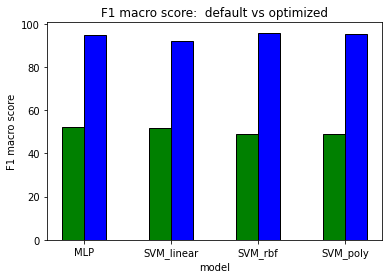

In [171]:
#plot
n=4
r = np.arange(n)
width = 0.25
  
  
percent_f1_default = [element * 100 for element in f1_default]  

percent_f1_optimized_values = [element * 100 for element in f1_optimized_values]

plt.bar(r, percent_f1_default, color = 'g', width = width, edgecolor = 'black')
plt.bar(r + width, percent_f1_optimized_values , color = 'b', width = width, edgecolor = 'black')
  
plt.xlabel("model")
plt.ylabel("F1 macro score")
plt.title("F1 macro score:  default vs optimized")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2, ['MLP','SVM_linear','SVM_rbf','SVM_poly'])
  
plt.show()

|   | MLP  | SVM_linear   |  SVM_rbf  | SVM_poly |
|---|---|---|---|---|
|   |0.9506353861192571 |0.9227661933291887 |0.9587126875435864 |0.9536813235593432 
|   |   |   |   |   |

Γενικά συμπεράσματα ύστερα από αρκετές "εκπαιδεύσης" του μοντέλου:
- βελτιώνεται ουσιαστικά η απόδοση με την βελτιστοποίηση, όπως ήταν και ο στόχος
- ο kernel rbf έχει τη βέλτιστη απόδοση πάντα και ακολουθεί ο πολυωνυμικός με πολυώνυμο βαθμού 4. Ο kernel linear έχει τη χειρότερη, όπως αναμενόταν, αφού τα data δεν είναι γραμμικά διαχωρίσιμα.
- το MLP έχει αρκετά καλή απόδοση , καλύτερη από του linear σε κάθε επανάληψη που έτρεξα, ωστόσο δεν έχει σταθερή απόδοση, υπάρχουν απότομες διακυμάνσεις μεταξύ 0.93-0.95. Αυτό οφείλεται στο ότι το MLP έχει μη κυρτή συνάρτηση κόστους με πολλές υπερπαραμέτρους, οπότε είναι δύσκολο να βρεθούν τιμές για όλες.
- Η χρήση του framework Optuna για την μελέτη απόδοσης του MLP προσφέρει ταχύτητα σε αντίθεση με το scikit learn.

#Πηγές

https://www.sciencedirect.com/science/article/pii/S0377221716000412

https://simonhessner.de/why-are-precision-recall-and-f1-score-equal-when-using-micro-averaging-in-a-multi-class-problem/

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0177678

https://towardsdatascience.com/svm-classifier-and-rbf-kernel-how-to-make-better-models-in-python-73bb4914af5b

https://github.com/optuna/optuna-examples/blob/main/sklearn/sklearn_simple.py





